### Import Packages

In [6]:
import pandas                        as     pd
import numpy                         as     np
import seaborn                       as     sns
import os 
import matplotlib.pyplot             as     plt
from   utils_text_clf                import utils_text_clf as utils
from   sklearn.feature_selection     import f_classif, \
                                            VarianceThreshold, \
                                            SelectKBest
from   sklearn.model_selection       import StratifiedKFold, \
                                            cross_validate, \
                                            cross_val_predict, \
                                            cross_val_score, \
                                            GridSearchCV, \
                                            train_test_split
from   sklearn.pipeline              import Pipeline, \
                                            make_pipeline
from   sklearn.preprocessing         import StandardScaler, \
                                            RobustScaler, \
                                            MinMaxScaler
from   sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from   sklearn.tree                  import DecisionTreeClassifier
from   sklearn.linear_model          import LogisticRegression, \
                                            SGDClassifier
from   sklearn.svm                   import LinearSVC, SVC
from   sklearn.neighbors             import KNeighborsClassifier
from   sklearn.naive_bayes           import GaussianNB
from   sklearn.ensemble              import RandomForestClassifier, \
                                            AdaBoostClassifier, \
                                            GradientBoostingClassifier, \
                                            StackingClassifier
from   mlxtend.classifier            import StackingClassifier
from   mlxtend.feature_selection     import ColumnSelector
from   sklearn.manifold              import TSNE
from   sklearn.decomposition         import PCA
from   xgboost                       import XGBClassifier
import xgboost                       as     xgb
from   sklearn.metrics               import roc_curve, \
                                            f1_score
from   scipy                         import interp
from   pathlib                       import Path
from   pickle                        import dump
import joblib

# Turn interactive plotting off
plt.ion()  
import warnings
warnings.filterwarnings("ignore")

### Run feature engineering

In [2]:
#%% run feature engineering code 
# %run feature_engineering.py
# print('done!')

### Enter mutable info

In [3]:
#%% Enter mutable info

data_dir    = os.path.join(os.getcwd(), 'data')
results_dir = os.path.join(os.getcwd(), 'results')

# training data 
#file_train = 'train.jsonl'

# training data
file_train  = 'train_feature_engineering.csv';
file_test   = 'test_feature_engineering.csv'

#file_train = os.path.join(data_dir, file_train) 
file_train  = os.path.join(data_dir, file_train) 
file_test   = os.path.join(data_dir, file_test)

### Load in data 

In [4]:
#%% load in data 

#df_train = utils.parse_json(file_train)
df_train  = pd.read_csv(file_train)

# feats
x_train  = df_train.iloc[:, 1:]

# labels 
y_train  = df_train.label

# convert labels to binary (1 - sarcasm)
y_train  = [1 if i == 'SARCASM' else 0 for i in y_train]

In [5]:
#%% check label proportions 

# print count
print('The count of sarcastic tweets is:', y_train.count(1))
print('The count of non-sarcastic tweets is:', y_train.count(0))

The count of sarcastic tweets is: 2500
The count of non-sarcastic tweets is: 2500


In [6]:
# check the size of the training data 
x_train.shape

(5000, 29)

In [7]:
x_train.describe()

,users_tagged,num_hashtags,num_capital,tweet_length_words,tweet_length_char,average_token_length,contains_laughter,contains_ellipses,strong_negations,strong_affirmatives,...,context_tweet_length_char,context_average_token_length,context_contains_laughter,context_contains_ellipses,context_strong_negations,context_strong_affirmatives,context_interjections,context_intensifiers,context_punctuation,context_emojis
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.000000,5000.000000
mean,1.947200,0.733800,5.856000,25.357800,100.386400,0.255635,0.032000,0.165800,0.209800,0.178600,...,561.159000,0.782949,0.0,0.0,0.0,0.0,0.0,0.0,1.998800,1.212000
std,0.933266,1.059227,8.217638,13.401869,51.590365,0.042288,0.184886,0.479538,0.491765,0.438566,...,537.603877,0.658256,0.0,0.0,0.0,0.0,0.0,0.0,3.286359,4.211865
min,0.000000,0.000000,0.000000,8.000000,24.000000,0.117117,0.000000,0.000000,0.000000,0.000000,...,86.000000,0.281854,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
25%,1.000000,0.000000,2.000000,16.000000,64.000000,0.227273,0.000000,0.000000,0.000000,0.000000,...,250.000000,0.404089,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
50%,2.000000,0.000000,4.000000,21.000000,86.000000,0.253012,0.000000,0.000000,0.000000,0.000000,...,392.000000,0.547531,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000
75%,3.000000,1.000000,7.000000,31.000000,122.250000,0.279570,0.000000,0.000000,0.000000,0.000000,...,630.000000,0.854243,0.0,0.0,0.0,0.0,0.0,0.0,3.000000,1.000000
max,4.000000,3.000000,165.000000,77.000000,238.000000,0.522727,2.000000,5.000000,4.000000,4.000000,...,5788.000000,5.404175,0.0,0.0,0.0,0.0,0.0,0.0,70.000000,80.000000


Remove features with 0 variance 

In [8]:
selector_var = VarianceThreshold()

# select feats with var > 0
selector_var.fit(x_train)

# filter 
x_train = x_train[x_train.columns[selector_var.get_support(indices = True)]]

In [9]:
x_train.head()

,users_tagged,num_hashtags,num_capital,tweet_length_words,tweet_length_char,average_token_length,contains_laughter,contains_ellipses,strong_negations,strong_affirmatives,...,punctuation,emojis,ngram_feature,context_users_tagged,context_num_hashtags,context_tweet_length_words,context_tweet_length_char,context_average_token_length,context_punctuation,context_emojis
0,3,0,1,25,99,0.252525,0,3,0,0,...,3,0,31.0,1,1,55,281,0.390073,0,1
1,2,0,4,21,88,0.238636,0,0,0,0,...,1,0,27.0,4,0,27,126,0.429294,1,0
2,3,1,13,14,73,0.191781,0,0,0,0,...,1,0,14.0,1,0,44,196,0.453922,0,0
3,2,0,6,21,108,0.194444,0,0,0,1,...,0,0,25.0,1,0,56,304,0.361325,0,0
4,2,3,22,30,143,0.209790,0,0,0,0,...,0,0,34.0,1,0,63,316,0.430424,0,0


In [10]:
# compute PCAs
x_train_scaled = StandardScaler().fit_transform(x_train)
pca            = PCA().fit(x_train_scaled)
print('pca done!')

pca done!


In [11]:
# variance explained 
var_exp = np.cumsum(pca.explained_variance_ratio_)

# num of components 
n_comp  = range(len(var_exp))

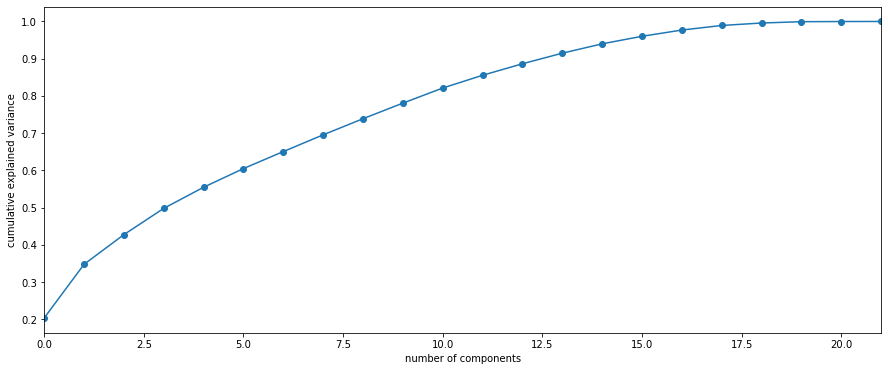

In [12]:
# plot explained variance vs. # of components 
ax = plt.figure(figsize = (15, 6))
plt.plot(n_comp, var_exp, '-o')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance') 
plt.autoscale(enable = True, axis = 'x', tight = True)

Find # of PCA components needed to explain 90% of variance in the data 

In [13]:
n_pca = np.where(var_exp >= 0.9)[0][0]
print(n_pca)

13


In [14]:
# save session 
import dill 
dill.dump_session('nb_pca_complete.db')
print('session saved!')

session saved!


In [15]:
# load session 
import dill 
dill.load_session('nb_pca_complete.db')
print('session loaded!')

session loaded!


In [16]:
# represent data using pca feats 
# x_train_pca = PCA(n_components = n_pca).fit_transform(x_train_scaled)

In [17]:
# x_train_pca.shape

### Violin plot

In [18]:
# prepare data 

# scale feats 
x_train_scaled  = pd.DataFrame(StandardScaler().fit_transform(x_train), columns = x_train.columns)

# combine x,y
df_train_scaled = pd.concat([df_train.label, x_train_scaled], axis = 1)

# unpivot
data            = pd.melt(df_train_scaled,
                          id_vars    = 'label',
                          var_name   = "features",
                          value_name = 'value')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'users_tagged'),
  Text(1, 0, 'num_hashtags'),
  Text(2, 0, 'num_capital'),
  Text(3, 0, 'tweet_length_words'),
  Text(4, 0, 'tweet_length_char'),
  Text(5, 0, 'average_token_length'),
  Text(6, 0, 'contains_laughter'),
  Text(7, 0, 'contains_ellipses'),
  Text(8, 0, 'strong_negations'),
  Text(9, 0, 'strong_affirmatives'),
  Text(10, 0, 'interjections'),
  Text(11, 0, 'intensifiers'),
  Text(12, 0, 'punctuation'),
  Text(13, 0, 'emojis'),
  Text(14, 0, 'ngram_feature'),
  Text(15, 0, 'context_users_tagged'),
  Text(16, 0, 'context_num_hashtags'),
  Text(17, 0, 'context_tweet_length_words'),
  Text(18, 0, 'context_tweet_length_char'),
  Text(19, 0, 'context_average_token_length'),
  Text(20, 0, 'context_punctuation'),
  Text(21, 0, 'context_emojis')])

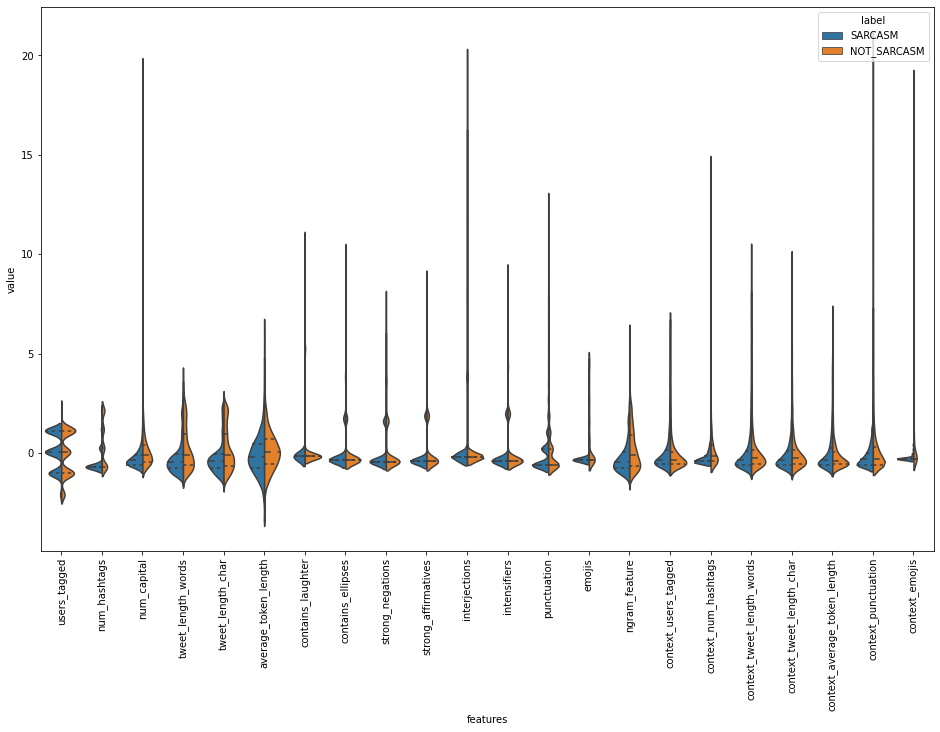

In [19]:
# violin plot 
plt.figure(figsize   = (16,10))
sns.violinplot(x     = "features", 
               y     = "value", 
               hue   = "label", 
               data  = data, 
               split = True, 
               inner = "quart")

plt.xticks(rotation  = 90)

### ANOVA F-Score 

<AxesSubplot:title={'center':'normalized F-score'}>

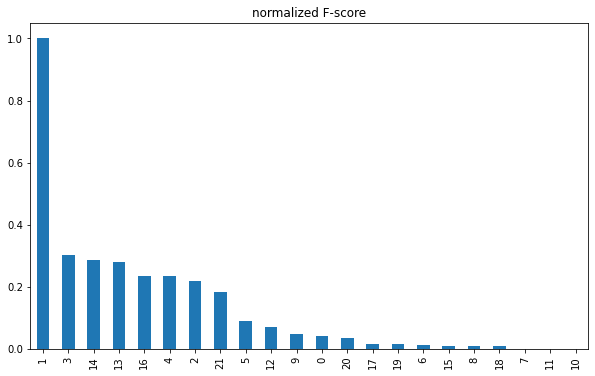

In [20]:
# compute ANOVA F-scores
fvals,_ = f_classif(x_train, y_train)

# normalize by max F score
f_imp   = pd.Series(fvals).div(fvals.max())

# sort in descending order 
f_imp.sort_values()[::-1].plot(kind    = 'bar', 
                               title   = "normalized F-score",
                               figsize = (10,6))

### Feature selection 

In [21]:
# selector = SelectKBest(f_classif, k = 12)

# selector.fit(x_train, y_train)

# # filter 
# x_train  = x_train[x_train.columns[selector.get_support(indices = True)]]

In [22]:
# x_train.head()

### TSNE

In [23]:
# scale feats 
x_train_scaled  = pd.DataFrame(StandardScaler().fit_transform(x_train), columns = x_train.columns)

In [24]:
# visualize features in low-dimensional space
tsne     = TSNE(n_components = 3, random_state = 42)

# transform on data 
tsne_obj = tsne.fit_transform(x_train_scaled)

# put results into a df
tsne_df  = pd.DataFrame({'x' : tsne_obj[:,0], 
                         'y' : tsne_obj[:,1], 
                         'z' : tsne_obj[:,2], 
                         'label': y_train})

print('done!')

done!


In [25]:
# save session 
import dill 
dill.dump_session('nb_tsne_complete.db')
print('session saved!')

session saved!


In [26]:
# load session 
import dill 
dill.load_session('nb_tsne_complete.db')
print('session loaded!')

session loaded!


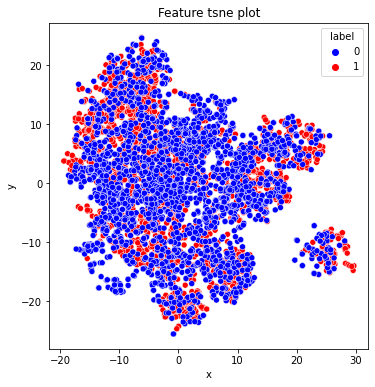

<Figure size 432x288 with 0 Axes>

In [27]:
#%% 2D scattrplot 
ax = plt.figure(figsize = (15, 6))
sns.scatterplot(x = "x", y = "y", hue = "label", palette = ["blue", "red"], 
                legend = 'full', data = tsne_df);
plt.title('Feature tsne plot')
plt.gca().set_aspect('equal', adjustable = 'box')

fig_name  = 'feat_tsne_plot_2d.jpg'
fig_file  = os.path.join(results_dir, fig_name)

# manager   = plt.get_current_fig_manager()
# manager.window.showMaximized()
plt.show()
plt.pause(0.1) # needed for the image to be saved at full size
plt.savefig(fig_file)

In [28]:
#%% 3D scatterplot 
from mpl_toolkits.mplot3d import axes3d    
%matplotlib qt 
ax = plt.figure(figsize=(16,10)).gca(projection = '3d')

ax.scatter3D(xs    = tsne_df.loc[tsne_df['label'] == 0]["x"],
             ys    = tsne_df.loc[tsne_df['label'] == 0]["y"],
             zs    = tsne_df.loc[tsne_df['label'] == 0]["z"],
             c     = 'blue', 
             alpha = 0.5,
             label = '0') 

ax.scatter3D(xs    = tsne_df.loc[tsne_df['label'] == 1]["x"],
             ys    = tsne_df.loc[tsne_df['label'] == 1]["y"],
             zs    = tsne_df.loc[tsne_df['label'] == 1]["z"],
             c     = 'red',
             alpha = 0.5,
             facecolors='none',
             label = '1') 

ax.set_xlabel('tsne_1')
ax.set_ylabel('tsne_2')
ax.set_zlabel('tsne_3')

plt.title('feat tsne scatterplot')
plt.legend()
plt.show()

fig_name  = 'feat_tsne_plot_3d.pickle'
fig_file  = os.path.join(results_dir, fig_name)

# save figure 
output    = open(fig_file, 'wb')
dump(plt.gcf(), output)
output.close()

In [29]:
%matplotlib inline

In [30]:
# create base models 

# lda 
lda_clf       = LinearDiscriminantAnalysis()
lda           = Pipeline([('scaler',    StandardScaler()), 
                          ('lda_clf',   lda_clf)]) 

# SGD
sgd_clf       = SGDClassifier(max_iter     = 10000,
                              loss         = 'log', 
                              penalty      = 'l1', 
                              tol          = 1e-4, 
                              class_weight = 'balanced')
sgd           = Pipeline([('scaler',    StandardScaler()), 
                          ('sgd_clf',   sgd_clf)]) 

# decision tree
dtree_clf     = DecisionTreeClassifier(class_weight = 'balanced', 
                                       random_state = 42)
dtree         = Pipeline([('scaler',    StandardScaler()), 
                          ('dtree_clf', dtree_clf)]) 

# logistic regression 
logreg_clf    = LogisticRegression(n_jobs       = -1, 
                                   class_weight = 'balanced', 
                                   random_state = 42)
logreg        = Pipeline([('scaler',     StandardScaler()),
                          ('logreg_clf', logreg_clf)]) 

# linear SVM
svc_lin_clf   = LinearSVC(max_iter     = 20000, 
                          class_weight = 'balanced', 
                          random_state = 42)
svc_lin       = Pipeline([('scaler',      StandardScaler()),
                          ('svc_lin_clf', svc_lin_clf)]) 

# rbf kernel SVM
svc_rbf_clf   = SVC(kernel       = 'rbf', 
                    C            = 1, 
                    gamma        = 'auto', 
                    probability  = True, 
                    max_iter     = 20000, 
                    random_state = 42)
svc_rbf       = Pipeline([('scaler',      StandardScaler()),
                          ('svc_rbf_clf', svc_rbf_clf)]) 

# naive Bayes 
NB_clf        = GaussianNB()
NB            = Pipeline([('scaler', StandardScaler()),
                          ('NB_clf', NB_clf)]) 

# KNN
knn_clf       = KNeighborsClassifier(n_jobs       = -1)
knn           = Pipeline([('scaler',  StandardScaler()),
                          ('knn_clf', knn_clf)]) 

# random forest classifier
rndf_clf      = RandomForestClassifier(n_estimators   = 250,  
                                       max_leaf_nodes = 16, 
                                       n_jobs         = -1, 
                                       class_weight   = 'balanced', 
                                       random_state   = 42)
rndf          = Pipeline([('scaler',   StandardScaler()),
                          ('rndf_clf', rndf_clf)]) 

# xgboost
xgboost_clf   = xgb.XGBClassifier(seed = 42)
xgboost       = Pipeline([('scaler',  StandardScaler()),
                          ('xgb_clf', xgboost_clf)]) 

# stochastic gradient boosting
gb_clf        = GradientBoostingClassifier(random_state = 42)
gb            = Pipeline([('scaler',  StandardScaler()),
                          ('gb_clf',  gb_clf)])

# adaboost
adb_clf       = AdaBoostClassifier(random_state = 42)
adb           = Pipeline([('scaler',  StandardScaler()),
                          ('adb_clf', adb_clf)]) 

#%% create model pipeline 

# Append models 
models        = [] 
models.append(['LDA'   , lda])
models.append(['SGD'   , sgd])
models.append(['DTREE' , dtree])
models.append(['LOGREG', logreg])
models.append(['SVCLIN', svc_lin])
models.append(['SVCRBF', svc_rbf])
models.append(['KNN'   , knn])
models.append(['NB'    , NB])
models.append(['RNDF'  , rndf])
models.append(['XGB'   , xgboost])

In [31]:
#%% set cross validation metrics 

n_splits      = 10 # folds 
cv            = StratifiedKFold(n_splits = n_splits, random_state = 42)
scores        = ['accuracy', 'recall', 'precision', 'roc_auc', 'f1']

#%% prepare cross-validation storage

# define the columns of the cross-validation results dataframe 
xval_cols     = ['classifier', 
                 'recall', 
                 'precision',
                 'f1',
                 'accuracy',
                 'roc_auc']

roc_cols      = ['classifier', 'tpr', 'fpr']

# dataframe to store cross-validation results 
df_xval       = pd.DataFrame(index = range(n_splits), columns = xval_cols)
df_xval_all   = pd.DataFrame()
df_xval_roc   = pd.DataFrame()

In [32]:
#%% spot check models on training data 

# loop through the classifiers 

for i, (name, model) in enumerate(models): 

    # cross-validate and compute scores 
    score_results              = cross_validate(model, 
                                                x_train, 
                                                y_train, 
                                                scoring            = scores, 
                                                cv                 = cv, 
                                                return_train_score = False, 
                                                n_jobs             = -1)
    
    print(name + ' cross-validation completed')

    # clean up the df 
    score_results              = pd.DataFrame(score_results).loc[:,['test_accuracy', 'test_f1', 'test_recall', 'test_precision', 'test_roc_auc']]
    score_results.columns      = score_results.columns.str.replace('test_','')
    
    # store the metric results 
    for metric in score_results.columns:
        df_xval.loc[:, metric] = score_results[metric]
        
    # Fill in the 'classifier' column 
    df_xval['classifier']      = np.repeat(name, n_splits, axis = 0)

    # compute class prediction probabilities 
    if hasattr(model, 'predict_proba'):
        y_pred                 = cross_val_predict(model, 
                                                   x_train, 
                                                   y_train, 
                                                   cv     = cv, 
                                                   n_jobs = -1, 
                                                   method = 'predict_proba')
        print(name + ' cross_val_predict completed')
                
    # compute the fpr, tpr
    fpr_reg                    = np.linspace(0, 1, 501) # at regular ticks 
            
    fpr, tpr, _                = roc_curve(y_train, y_pred[:,1], pos_label = 1)
    tpr                        = interp(fpr_reg, fpr, tpr)
        
    # Store fpr, tpr
    run_dict                   = dict.fromkeys(roc_cols) 
    run_dict['fpr']            = list(fpr_reg)
    run_dict['tpr']            = list(tpr)
    run_dict['classifier']     = name

    # append to the roc results dataframe 
    df_xval_roc                = df_xval_roc.append(pd.Series(run_dict).to_frame().T, ignore_index = True) 

    # append to the overall cross-validation results dataframe 
    df_xval_all                = df_xval_all.append(df_xval, ignore_index = True)
    
print('all done!')


LDA cross-validation completed
LDA cross_val_predict completed
SGD cross-validation completed
SGD cross_val_predict completed
DTREE cross-validation completed
DTREE cross_val_predict completed
LOGREG cross-validation completed
LOGREG cross_val_predict completed
SVCLIN cross-validation completed
SVCRBF cross-validation completed
SVCRBF cross_val_predict completed
KNN cross-validation completed
KNN cross_val_predict completed
NB cross-validation completed
NB cross_val_predict completed
RNDF cross-validation completed
RNDF cross_val_predict completed
XGB cross-validation completed
XGB cross_val_predict completed
all done!


In [33]:
#%% review x-val results 

df_xval_all.groupby('classifier').mean()

,recall,precision,f1,accuracy,roc_auc
classifier,,,,,
DTREE,0.6436,0.674940,0.657445,0.6638,0.663726
KNN,0.7480,0.668249,0.705220,0.6866,0.741818
LDA,0.8144,0.690314,0.745755,0.7206,0.791675
LOGREG,0.7956,0.702781,0.744881,0.7256,0.796947
NB,0.8492,0.632957,0.724088,0.6754,0.753277
RNDF,0.7132,0.713152,0.712121,0.7104,0.786894
SGD,0.7828,0.702732,0.736767,0.7192,0.784368
SVCLIN,0.8108,0.698568,0.749262,0.7268,0.797819
SVCRBF,0.7816,0.705855,0.740682,0.7250,0.796488


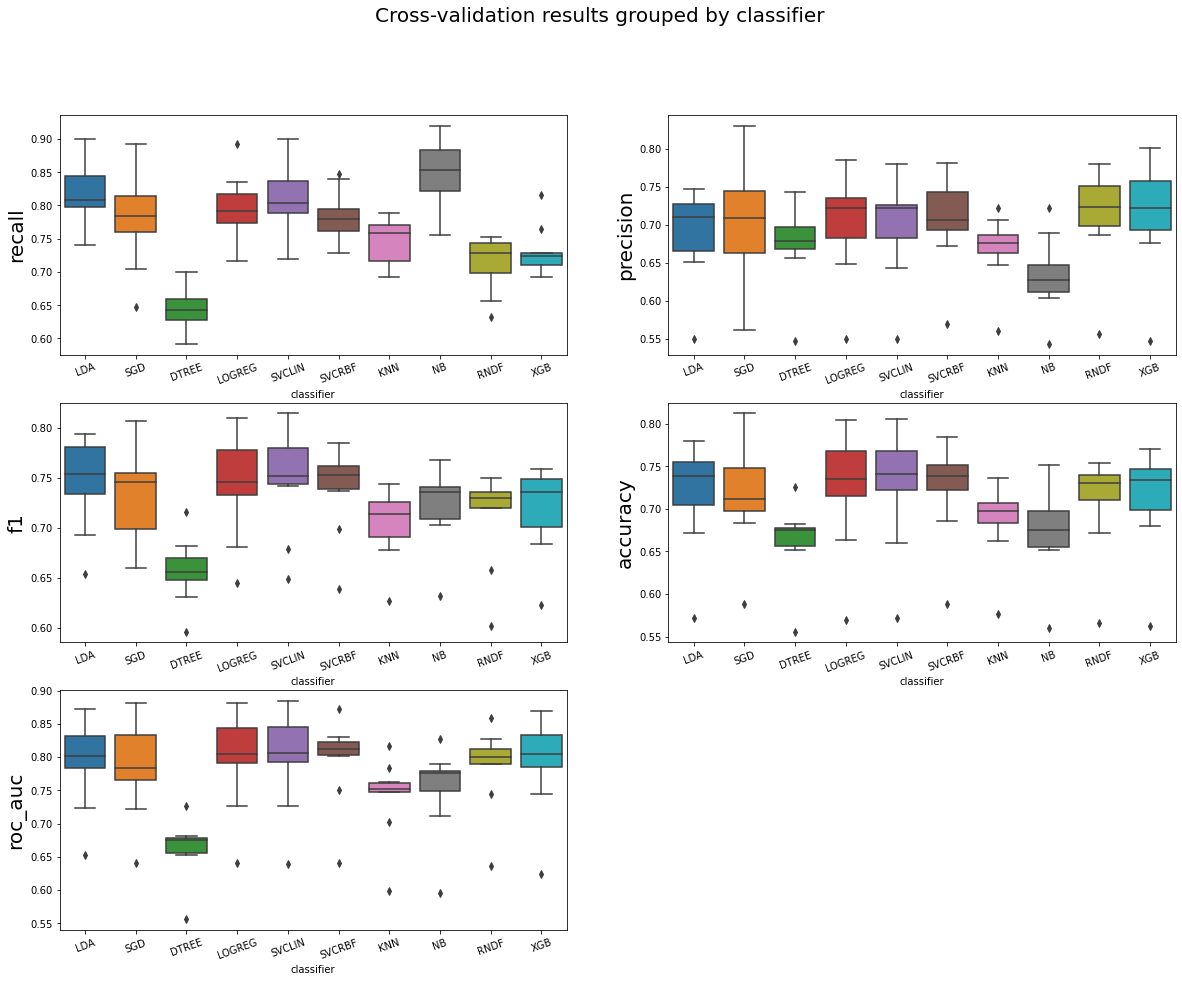

<Figure size 432x288 with 0 Axes>

In [34]:
#%% boxplot of results 

fig       = plt.figure(figsize = (20,15))
fig.tight_layout()

for i, metric in enumerate(df_xval_all.drop(['classifier'], axis = 1)):
    ax    = fig.add_subplot(3, 2, i+1)
    h     = sns.boxplot(y      = metric, 
                        x      = 'classifier', 
                        data   = df_xval_all,  
                        orient = 'v', 
                        ax     = ax)
    h.set_ylabel(metric,fontsize = 20)
    h.set_xticklabels(h.get_xticklabels(), rotation = 20)
    h.set_xlabel('classifier',fontsize = 10)
    plt.tick_params(labelsize = 10)

fig.suptitle('Cross-validation results grouped by classifier', fontsize = 20)

# save fig
fig_name  = 'x_train_xval_results.jpg'
fig_file  = os.path.join(results_dir, fig_name)

# manager   = plt.get_current_fig_manager()
# manager.window.showMaximized()

plt.show()
plt.pause(0.1) # needed for the image to be saved at full size
plt.savefig(Path(fig_file))

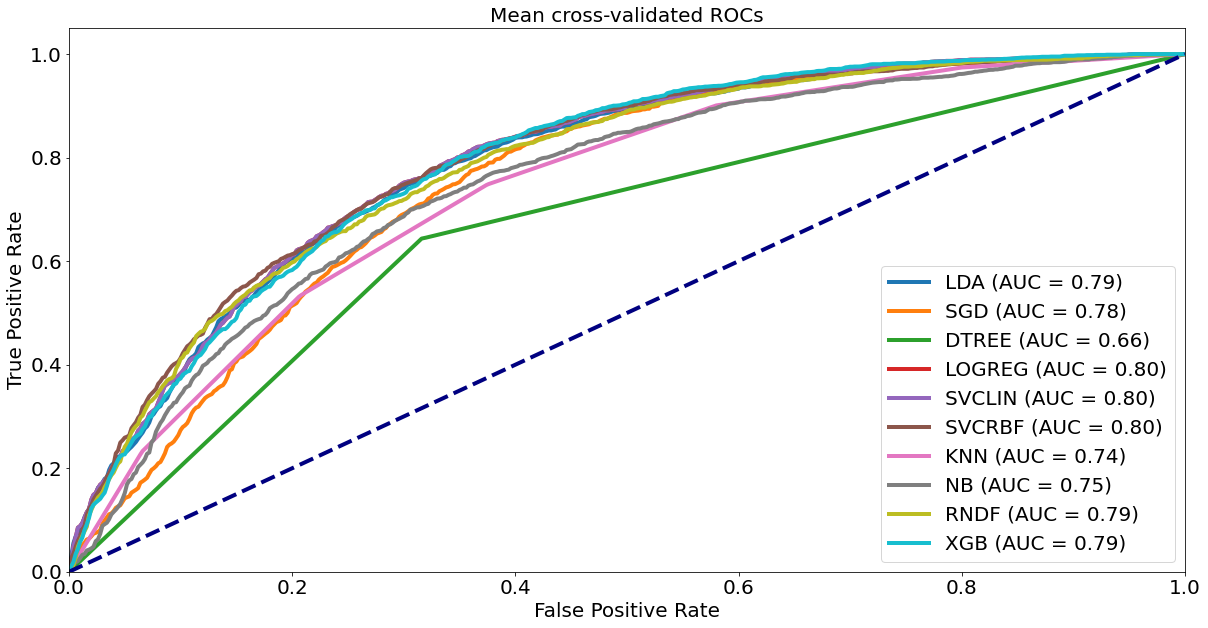

<Figure size 432x288 with 0 Axes>

In [37]:
#%% plot cross-validated ROC 

# Plot roc
plt.figure(figsize = [20,10])

for i in range(len(df_xval_roc.index)):
    
    # id classifier
    clf = df_xval_roc.loc[i, 'classifier']
    
    plt.plot(df_xval_roc.loc[i, 'fpr'], df_xval_roc.loc[i, 'tpr'], lw = 4, 
             label = df_xval_roc.loc[i, 'classifier'] + ' (AUC = %0.2f)' % df_xval_all[df_xval_all['classifier'] == clf]['roc_auc'].mean())

plt.plot([0, 1], [0, 1], color='navy', lw = 4, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Mean cross-validated ROCs', fontsize = 20)
plt.legend(loc="lower right", prop={'size': 20})
plt.tick_params(labelsize = 20)
plt.show()

# save fig
fig_name  = 'x_train_xval_roc.jpg'
fig_file  = os.path.join(results_dir, fig_name)

# manager   = plt.get_current_fig_manager()
# manager.window.showMaximized()
plt.show()
plt.pause(0.1) # needed for the image to be saved at full size
plt.savefig(Path(fig_file))


In [36]:
# common params 

# define scalers to try
scalers     = [StandardScaler(), 
               RobustScaler(), 
               MinMaxScaler()]

# define cross-val method
cv          = StratifiedKFold(n_splits     = 10, 
                              shuffle      = True, 
                              random_state = 42)

# define scoring metric
metric      = 'f1'

### Logistic regression classifier

In [39]:
#%% log_reg clf

# base clf
logreg_clf    = LogisticRegression(n_jobs       = -1, 
                                   class_weight = 'balanced', 
                                   random_state = 42)

# create model pipeline 
pipe_logreg   = Pipeline([('scaler',     StandardScaler()),
                          ('classifier', logreg_clf)])

# define param grid
params_logreg = {'scaler'                   : scalers,
                 'classifier'               : [logreg_clf],
                 'classifier__penalty'      : ['l2'],
                 'classifier__C'            : np.logspace(-3, 3, 12),
                 'classifier__max_iter'     : [20000], 
                 'classifier__class_weight' : ['balanced']}

grid_logreg   = GridSearchCV(pipe_logreg, 
                             cv                 = cv, 
                             param_grid         = params_logreg, 
                             scoring            = metric,
                             refit              = True, 
                             return_train_score = False, 
                             n_jobs             = -1, 
                             verbose            = 1)

# perform tuning and extract best model
best_logreg = grid_logreg.fit(x_train, y_train).best_estimator_

print('tuning log_reg clf complete')
print('Best parameters: %s' % grid_logreg.best_params_)
print('Mean cross-validated F1: %.2f' % grid_logreg.best_score_)


Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s


tuning log_reg clf complete
Best parameters: {'classifier': LogisticRegression(C=0.5336699231206307, class_weight='balanced',
                   max_iter=20000, n_jobs=-1, random_state=42), 'classifier__C': 0.5336699231206307, 'classifier__class_weight': 'balanced', 'classifier__max_iter': 20000, 'classifier__penalty': 'l2', 'scaler': RobustScaler()}
Mean cross-validated F1: 0.75


[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    6.6s finished


### Linear SVC

In [41]:
#%% svc_lin

# base clf
svc_lin_clf    = LinearSVC(max_iter     = 20000, 
                           class_weight = 'balanced', 
                           random_state = 42)

# create model pipeline 
pipe_svc_lin   = Pipeline([('scaler',     StandardScaler()),
                           ('classifier', svc_lin_clf)])

# define param grid
params_svc_lin = {'scaler'                   : scalers,
                  'classifier'               : [svc_lin_clf],
                  'classifier__penalty'      : ['l1', 'l2'],
                  'classifier__loss'         : ['hinge', 'squared_hinge'],
                  'classifier__C'            : np.logspace(-3, 3, 12),
                  'classifier__max_iter'     : [20000], 
                  'classifier__class_weight' : ['balanced']}

grid_svc_lin   = GridSearchCV(pipe_svc_lin, 
                              cv                 = cv, 
                              param_grid         = params_svc_lin, 
                              scoring            = metric,
                              refit              = True, 
                              return_train_score = False, 
                              n_jobs             = -1, 
                              verbose            = 1)

# perform tuning and extract best model
best_svc_lin   = grid_svc_lin.fit(x_train, y_train).best_estimator_

print('tuning svc_lin clf complete')
print('Best parameters: %s' % grid_svc_lin.best_params_)
print('Mean cross-validated F1: %.2f' % grid_svc_lin.best_score_)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 858 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1208 tasks      | elapsed:  5.2min


tuning svc_lin clf complete
Best parameters: {'classifier': LinearSVC(C=0.5336699231206307, class_weight='balanced', loss='hinge',
          max_iter=20000, random_state=42), 'classifier__C': 0.5336699231206307, 'classifier__class_weight': 'balanced', 'classifier__loss': 'hinge', 'classifier__max_iter': 20000, 'classifier__penalty': 'l2', 'scaler': RobustScaler()}
Mean cross-validated F1: 0.76


[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  9.3min finished


In [42]:
# pickle the model 
file_model   = os.path.join(results_dir, 'best_svc_lin.sav')
dump(best_svc_lin, open(file_model, 'wb'))

### SGD

In [43]:
#%% sgd clf

# base clf
sgd_clf      = SGDClassifier(max_iter       = 20000,
                             tol            = 1e-4, 
                             class_weight   = 'balanced', 
                             early_stopping = True)

# create model pipeline 
pipe_sgd     = Pipeline([('scaler',     StandardScaler()),
                         ('classifier', sgd_clf)])

# define param grid
params_sgd   = {'scaler'                   : scalers,
                'classifier'               : [sgd_clf],
                'classifier__penalty'      : ['l1', 'l2', 'elasticnet'],
                'classifier__loss'         : ['hinge', 'squared_hinge', 'log', 'perceptron']}

grid_sgd     = GridSearchCV(pipe_sgd, 
                            cv                 = cv, 
                            param_grid         = params_sgd, 
                            scoring            = metric,
                            refit              = True, 
                            return_train_score = False, 
                            n_jobs             = -1, 
                            verbose            = 1)

# perform tuning and extract best model
best_sgd     = grid_sgd.fit(x_train, y_train).best_estimator_

print('tuning sgd clf complete')
print('Best parameters: %s' % grid_sgd.best_params_)
print('Mean cross-validated F1: %.2f' % grid_sgd.best_score_)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    6.1s


tuning sgd clf complete
Best parameters: {'classifier': SGDClassifier(class_weight='balanced', early_stopping=True, max_iter=20000,
              tol=0.0001), 'classifier__loss': 'hinge', 'classifier__penalty': 'l2', 'scaler': MinMaxScaler()}
Mean cross-validated F1: 0.74


[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    8.4s finished


In [44]:
# pickle the model 
file_model   = os.path.join(results_dir, 'best_sgd.sav')
dump(best_sgd, open(file_model, 'wb'))

### LDA

In [45]:
#%% lda

# base clf
lda_clf      = LinearDiscriminantAnalysis()

# create model pipeline 
pipe_lda     = Pipeline([('scaler',     StandardScaler()),
                         ('classifier', lda_clf)])

# define param grid
params_lda   = {'scaler'                   : scalers,
                'classifier'               : [lda_clf],
                'classifier__solver'       : ['svd', 'lsqr', 'eigen'],
                'classifier__shrinkage'    : np.arange(0, 1, 0.01)}

grid_lda     = GridSearchCV(pipe_lda, 
                            cv                 = cv, 
                            param_grid         = params_lda, 
                            scoring            = metric,
                            refit              = True, 
                            return_train_score = False, 
                            n_jobs             = -1, 
                            verbose            = 1)

# perform tuning and extract best model
best_lda     = grid_lda.fit(x_train, y_train).best_estimator_

print('tuning lda clf complete')
print('Best parameters: %s' % grid_lda.best_params_)
print('Mean cross-validated F1: %.2f' % grid_lda.best_score_)

Fitting 10 folds for each of 900 candidates, totalling 9000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 2452 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 3552 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done 4852 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done 6352 tasks      | elapsed:   55.3s
[Parallel(n_jobs=-1)]: Done 8052 tasks      | elapsed:  1.2min


tuning lda clf complete
Best parameters: {'classifier': LinearDiscriminantAnalysis(shrinkage=0.0, solver='lsqr'), 'classifier__shrinkage': 0.0, 'classifier__solver': 'lsqr', 'scaler': StandardScaler()}
Mean cross-validated F1: 0.75


[Parallel(n_jobs=-1)]: Done 9000 out of 9000 | elapsed:  1.3min finished


In [46]:
# pickle the model 
file_model   = os.path.join(results_dir, 'best_lda.sav')
dump(best_lda, open(file_model, 'wb'))

In [47]:
# save session 
import dill 
dill.dump_session('nb_hparam_tuning_complete.db')
print('session saved!')

session saved!


In [1]:
# load session 
import dill 
dill.load_session('nb_hparam_tuning_complete.db')
print('session loaded!')

session loaded!


### XGBOOST

validation set F1: 0.75


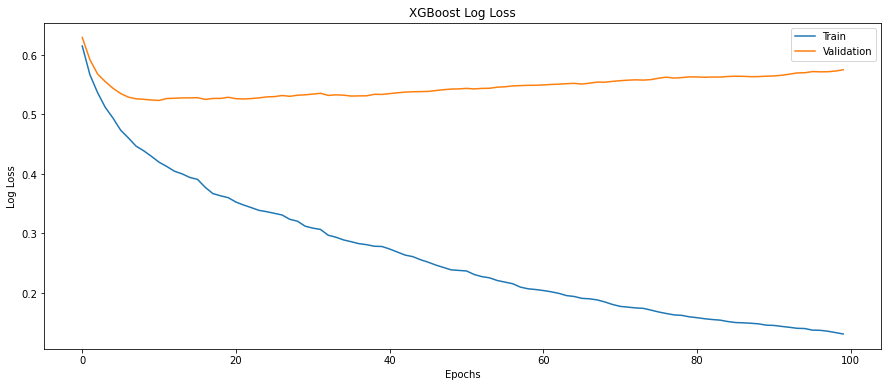

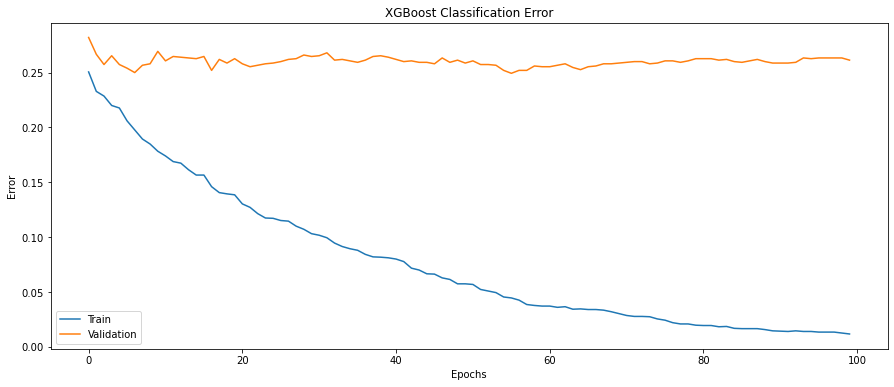

In [18]:
model = XGBClassifier()

# split data into train and validation sets
x_sub_train, x_val, y_sub_train, y_val = train_test_split(StandardScaler().fit_transform(x_train), 
                                                          y_train, 
                                                          test_size    = 0.3, 
                                                          random_state = 42)

# fit model on training data
eval_set = [(x_sub_train, y_sub_train), (x_val, y_val)]

model.fit(x_sub_train, 
          y_sub_train, 
          eval_metric = ['error', 'logloss'], 
          eval_set    = eval_set, 
          verbose     = False)

# evaluate predictions on validation set
score = f1_score(y_val, model.predict(x_val))
print('validation set F1: %.2f' % score)

# retrieve performance metrics
results = model.evals_result()
epochs  = len(results['validation_0']['error'])
x_axis  = range(0, epochs)

# plot logloss
fig, ax = plt.subplots(figsize = (15, 6))
ax.plot(x_axis, results['validation_0']['logloss'], label = 'Train')
ax.plot(x_axis, results['validation_1']['logloss'], label = 'Validation')
ax.legend()
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

# plot error
fig, ax = plt.subplots(figsize = (15, 6))
ax.plot(x_axis, results['validation_0']['error'], label = 'Train')
ax.plot(x_axis, results['validation_1']['error'], label = 'Validation')
ax.legend()
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('XGBoost Classification Error')
plt.show()

ax.autoscale()

Learning curves clearly show overfitting w/ too many training epochs. **Early stopping** is needed.

In [19]:
# apply early stopping 
eval_set = [(x_val, y_val)]

model.fit(x_sub_train, 
          y_sub_train, 
          early_stopping_rounds = 10,
          eval_metric = ['logloss'], 
          eval_set    = eval_set, 
          verbose     = False)

# evaluate predictions on validation set
score = f1_score(y_val, model.predict(x_val))
print('validation set F1: %.2f' % score)

validation set F1: 0.75


### Stacking classifier (sklearn version)

In [ ]:
# # define the base models

# # lda
# lda_clf      = LinearDiscriminantAnalysis()

# # create model pipeline 
# pipe_lda     = Pipeline([('scaler',  StandardScaler()),
#                          ('clf',     lda_clf)])

# # svc_lin
# svc_lin_clf  = LinearSVC(max_iter     = 20000, 
#                          class_weight = 'balanced', 
#                          random_state = 42)

# # create model pipeline 
# pipe_svc_lin = Pipeline([('scaler',  StandardScaler()),
#                          ('clf',     svc_lin_clf)])


# # logreg 
# # base clf
# logreg_clf   = LogisticRegression(n_jobs       = -1, 
#                                   class_weight = 'balanced', 
#                                   random_state = 42, 
#                                   max_iter     = 20000)

# # create model pipeline 
# pipe_logreg  = Pipeline([('scaler',  StandardScaler()),
#                          ('clf',     logreg_clf)])

# # append base models
# level0       = list()
# level0.append(('lr',           pipe_logreg))
# level0.append(('svc_lin',      pipe_svc_lin))
# level0.append(('lda',          pipe_lda))

# # define meta learner model
# level1    = LogisticRegression()

# # define the stacking ensemble
# # stack_ens = StackingClassifier(estimators = level0, final_estimator = level1, cv = cv)
# stack_ens = StackingClassifier(estimators = level0, final_estimator = level1, cv = cv, passthrough = True)

In [ ]:
# # define param grid
# grid_stack = {'lda__clf__solver'           : ['svd', 'lsqr', 'eigen'],
#               'lda__clf__shrinkage'        : np.arange(0, 1, 0.1), 
#               'svc_lin__clf__penalty'      : ['l1', 'l2'],
#               'svc_lin__clf__loss'         : ['hinge', 'squared_hinge'],
#               'svc_lin__clf__C'            : [0.001, 0.1, 1, 10, 100, 1000],
#               'lr__clf__penalty'           : ['l2'],
#               'lr__clf__C'                 : [0.001, 0.1, 1, 10, 100, 1000]}


In [ ]:
# tune_stack   = GridSearchCV(stack_ens, 
#                             cv                 = cv, 
#                             param_grid         = grid_stack, 
#                             scoring            = metric,
#                             refit              = True, 
#                             return_train_score = False, 
#                             n_jobs             = -1, 
#                             verbose            = 1)

# # perform tuning and extract best model
# best_stack    = tune_stack.fit(x_train, y_train).best_estimator_

# print('tuning stacking ensemble complete')

## Stacking classifier (mlxtend version)

### Method 1: simple stacked classifier

Using default linear models 

In [30]:
sclf_1 = StackingClassifier(classifiers     = [lda, 
                                               logreg, 
                                               svc_lin],                                              
                            meta_classifier = LogisticRegression())

In [31]:
# eval performance via cv
scores = cross_val_score(sclf_1, 
                         x_train, 
                         y_train, 
                         cv      = cv, 
                         scoring = metric, 
                         verbose = 1, 
                         n_jobs  = -1)

print("F1: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   10.0s remaining:    6.6s


F1: 0.75 (+/- 0.02)


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   13.4s finished


### Method 2: using probabilities as meta-features
svc_lin omitted b/c does not have **'predict_proba'** attribute

In [28]:
sclf_2 = StackingClassifier(classifiers     = [lda, logreg],
                            use_probas      = True,
                            average_probas  = False,
                            meta_classifier = LogisticRegression())

In [29]:
# eval performance via cv
scores = cross_val_score(sclf_2, 
                         x_train, 
                         y_train, 
                         cv      = cv, 
                         scoring = metric, 
                         verbose = 1, 
                         n_jobs  = -1)

print("F1: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


F1: 0.75 (+/- 0.02)


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished


### Method 3: stacked classification and grid search

In [98]:
# define the base models

# lda
lda_clf      = LinearDiscriminantAnalysis()

# svc_lin
svc_lin_clf  = LinearSVC(max_iter     = 20000, 
                         class_weight = 'balanced', 
                         random_state = 42)

# logreg 
# base clf
logreg_clf   = LogisticRegression(n_jobs       = -1, 
                                  class_weight = 'balanced', 
                                  random_state = 42, 
                                  max_iter     = 20000)

# append base models
level0       = [lda_clf, svc_lin_clf, logreg_clf]

# define meta learner model
level1       = LogisticRegression()

In [99]:
# define param grid
# params_stack = {'lineardiscriminantanalysis__solver'    : ['svd', 'lsqr', 'eigen'],
#                 'lineardiscriminantanalysis__shrinkage' : np.arange(0, 1, 0.1), 
#                 'linearsvc__penalty'                    : ['l1', 'l2'],
#                 'linearsvc__loss'                       : ['hinge', 'squared_hinge'],
#                 'linearsvc__C'                          : [0.001, 0.1, 1, 10, 100, 1000],
#                 'logisticregression__penalty'           : ['l2'],
#                 'logisticregression__C'                 : [0.001, 0.1, 1, 10, 100, 1000],
#                 'meta_classifier__C'                    : [0.001, 0.1, 1, 10, 100, 1000]}

params_stack = {'meta_classifier__C'         : np.logspace(-3, 3, 12)}

In [101]:
sclf_3     = StackingClassifier(classifiers     = level0, 
                                meta_classifier = level1)

grid_stack = GridSearchCV(estimator          = sclf_3, 
                          param_grid         = params_stack, 
                          scoring            = metric,
                          refit              = True,
                          cv                 = cv,
                          return_train_score = False,
                          n_jobs             = -1,
                          verbose            = 1)


# perform tuning and extract best model
best_sclf_3 = grid_stack.fit(StandardScaler().fit_transform(x_train), y_train).best_estimator_

print('tuning stacking clf complete')
print('Best parameters: %s' % grid_stack.best_params_)
print('Mean cross-validated F1: %.2f' % grid_stack.best_score_)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  3.3min finished


tuning stacking clf complete
Best parameters: {'meta_classifier__C': 0.001}
Mean cross-validated F1: 0.75


### Method 4: stacking of classifiers that operate on different feature subsets

### Method 5: using pre-fitted classifiers
Use hyperparam-tuned linear classifiers

In [106]:
sclf_5 = StackingClassifier(classifiers         = [best_lda, best_logreg, best_svc_lin],
                            meta_classifier     = LogisticRegression(C = best_sclf_3.meta_classifier.C), 
                            fit_base_estimators = False)

Please note that fit_base_estimators=False is **incompatible to any form of cross-validation** that is done in e.g., model_selection.cross_val_score or model_selection.GridSearchCV, etc., since it would require the classifiers to be refit to the training folds. Thus, only use fit_base_estimators=False if you want to make a prediction directly without cross-validation.

In [107]:
# manually code up 10 fold cv

scores = list()

# cv is the stratifiedkfold obj defined earlier
for train_inds, test_inds in cv.split(x_train, y_train):
    
    # split the train/val folds
    x_fold_train, x_fold_test = x_train.loc[train_inds], x_train.loc[test_inds]
    y_fold_train, y_fold_test = np.array(y_train)[train_inds], np.array(y_train)[test_inds]
    
    # train 
    sclf_5.fit(x_fold_train, y_fold_train)
    
    # predict and get F1 score
    score = f1_score(y_fold_test, sclf_5.predict(x_fold_test))
    
    scores.append(score)
    
print('cv done!')

cv done!


In [108]:
print('Mean cross-validated F1: %.2f' % np.array(scores).mean())
print('std cross-validated F1: %.2f' % np.array(scores).std())

Mean cross-validated F1: 0.76
std cross-validated F1: 0.02


### Method 6: try different meta learner
e.g. linear svc

Retrain best model on the entire training set 

In [42]:
# default models

svc_rbf_final = svc_rbf.fit(x_train, y_train)
score         = f1_score(y_train, svc_rbf_final.predict(x_train))
print('svc_rbf_final F1: %.2f' % score)

rndf_final    = rndf.fit(x_train, y_train)
score         = f1_score(y_train, rndf_final.predict(x_train))
print('rndf_final F1: %.2f' % score)

xgb_final     = XGBClassifier().fit(x_sub_train, 
                                    y_sub_train, 
                                    early_stopping_rounds = 10,
                                    eval_metric = ['logloss'], 
                                    eval_set    = eval_set, 
                                    verbose     = False)

score         = f1_score(y_train, xgb_final.predict(StandardScaler().fit_transform(x_train)))
print('xgb_final F1: %.2f' % score)

# add pipeline to final xgboost clf
xgb_final     = make_pipeline(StandardScaler().fit(x_train), xgb_final)

adb_final     = adb.fit(x_train, y_train)
score         = f1_score(y_train, adb_final.predict(x_train))
print('adb_final F1: %.2f' % score)

gb_final      = gb.fit(x_train, y_train)
score         = f1_score(y_train, gb_final.predict(x_train))
print('gb_final F1: %.2f' % score)

print('all done!')

svc_rbf_final F1: 0.79
rndf_final F1: 0.73
xgb_final F1: 0.81
adb_final F1: 0.75
gb_final F1: 0.79
all done!


In [113]:
# hyperparam tuned models 

svc_lin_final   = best_svc_lin.fit(x_train, y_train) # good 
score           = f1_score(y_train, svc_lin_final.predict(x_train))
print('svc_lin_final F1: %.2f' % score)

logreg_final    = best_logreg.fit(x_train, y_train)  # good
score           = f1_score(y_train, logreg_final.predict(x_train))
print('logreg_final F1: %.2f' % score)

lda_final       = best_lda.fit(x_train, y_train)
score           = f1_score(y_train, lda_final.predict(x_train))
print('lda_final F1: %.2f' % score)

sgd_final       = best_sgd.fit(x_train, y_train)
score           = f1_score(y_train, sgd_final.predict(x_train))
print('sgd_final F1: %.2f' % score)

print('all done!')

svc_lin_final F1: 0.76
logreg_final F1: 0.75
lda_final F1: 0.75
sgd_final F1: 0.73
all done!


In [114]:
# stacking ensemble 
sclf_1_final = sclf_1.fit(x_train, y_train)
score        = f1_score(y_train, sclf_1_final.predict(x_train))
print('sclf_1_final F1: %.2f' % score)

sclf_2_final = sclf_2.fit(x_train, y_train)
score        = f1_score(y_train, sclf_2_final.predict(x_train))
print('sclf_2_final F1: %.2f' % score)

sclf_3_final = best_sclf_3.fit(x_train, y_train)
score        = f1_score(y_train, sclf_3_final.predict(x_train))
print('sclf_3_final F1: %.2f' % score)

sclf_5_final = sclf_5.fit(x_train, y_train)
score        = f1_score(y_train, sclf_5_final.predict(x_train))
print('sclf_5_final F1: %.2f' % score)

print('all done!')

sclf_1_final F1: 0.76
sclf_2_final F1: 0.75
sclf_3_final F1: 0.76
sclf_5_final F1: 0.76
all done!


Load test data 

In [36]:
# process test data 
df_test  = pd.read_csv(file_test)

# feats
x_test   = df_test.iloc[:, 1:]

# remove low var feats (as in x_train)
x_test   = x_test[x_test.columns[selector_var.get_support(indices = True)]]

# tweet id
t_id     = df_test.id.to_frame()

In [43]:
# gather models 

final_models = {'lda'      : lda_final,
                'sgd'      : sgd_final,
                'svc_lin'  : svc_lin_final,
                'logreg'   : logreg_final, 
                'svc_rbf'  : svc_rbf_final,
                'rndf'     : rndf_final,
                'xgb'      : xgb_final, 
                'adb'      : adb_final, 
                'gb'       : gb_final, 
                'sclf_1'   : sclf_1_final, 
                'sclf_2'   : sclf_2_final,   
                'sclf_5'   : sclf_5_final}

In [44]:
#%% make prediction 

for name, model in final_models.items(): 
    
    # make prediction 
    pred     = model.predict(x_test)
    
    # convert to text labels
    pred     = ['SARCASM' if i == 1 else 'NOT_SARCASM' for i in pred]
    
    pred     = pd.DataFrame(pred, columns = ['predictions'])

    # concat into df
    answer   = pd.concat([t_id, pred], axis = 1)
    
    # construct file name 
    file_ans = Path(os.path.join(os.getcwd(), 'answer_' + name + '.txt'))
    
    # name the file, based on the classifier
    answer.to_csv(file_ans, header = None, index = None, sep = ',')
    
print('all predictions completed!')

all predictions completed!


In [45]:
# save session 
import dill 
dill.dump_session('nb_stacking_complete.db')
print('session saved!')

session saved!


In [1]:
# load session 
import dill 
dill.load_session('nb_stacking_complete.db')
print('session loaded!')

session loaded!
